In [1]:
from util_comp import *
from scipy.cluster.hierarchy import dendrogram , linkage , fcluster
from sklearn.preprocessing import StandardScaler

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = main(one_hot=True)

Elapsed time to compute age categorisation: 0 minutes and 0 seconds
Elapsed time to compute correct systematic error: 0 minutes and 11 seconds
Elapsed time to compute load column names: 0 minutes and 0 seconds
Elapsed time to compute MICE imputation: 1 minutes and 23 seconds
Elapsed time to compute complete MICE imputation: 1 minutes and 23 seconds
Elapsed time to compute categorisation of outcome column: 0 minutes and 3 seconds
Elapsed time to compute change values in catagorical columns: 11 minutes and 29 seconds
Elapsed time to compute OneHotEncoding: 0 minutes and 1 seconds
Elapsed time to compute Full process: 13 minutes and 7 seconds


In [3]:
data.head()

,"Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?",outcome,"(Q1- Your sex?_A man,)","(Q1- Your sex?_A woman,)","(Q1- Your sex?_None,)","(Q2- How old are you?_18 - 30,)","(Q2- How old are you?_30 - 39,)",...,"(Q62- Do you take sleeping pills, anxiolytics or anti-depressants:_Several times a month,)","(Q63- Over the past 12 months have you experienced the following difficulties?-Sleep disorders (difficulty falling asleep, waking up at night, waking up early without being able to go back to sleep, etc.)_Never,)","(Q63- Over the past 12 months have you experienced the following difficulties?-Sleep disorders (difficulty falling asleep, waking up at night, waking up early without being able to go back to sleep, etc.)_often,)","(Q63- Over the past 12 months have you experienced the following difficulties?-Sleep disorders (difficulty falling asleep, waking up at night, waking up early without being able to go back to sleep, etc.)_permanently,)","(Q63- Over the past 12 months have you experienced the following difficulties?-Sleep disorders (difficulty falling asleep, waking up at night, waking up early without being able to go back to sleep, etc.)_sometimes,)","(Q63- Over the past 12 months have you experienced the following difficulties?-A lack of tone_Never,)","(Q63- Over the past 12 months have you experienced the following difficulties?-A lack of tone_often,)","(Q63- Over the past 12 months have you experienced the following difficulties?-A lack of tone_permanently,)","(Q63- Over the past 12 months have you experienced the following difficulties?-A lack of tone_sometimes,)","(Q63- Over the past 12 months have you experienced the following difficulties?-A lack of tone_None,)"
0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0.0,0.0,0.0,0.0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,2.0,0.0,0.0,0.0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0.0,0.0,0.0,0.0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0.0,0.0,2.0,2.0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [4]:
data.describe

<bound method NDFrame.describe of        Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
0                                                    0.0                                                                   
1                                                    0.0                                                                   
2                                                    2.0                                                                   
3                                                    0.0                                                                   
4                                                    0.0                                                                   
...                                                  ...                                                                   
44530                                                1.0                                          

In [5]:
not_cat = [
    "Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?",
    "outcome"
]

# catagorical columns (everything other than the non_categorical columns)
categorical_cols = [col for col in data.columns if col not in not_cat]

In [6]:
# df_features = data.drop(categorical_cols, axis=1)
df_features = data.drop("outcome", axis=1)
df_features.columns = [str(col) for col in df_features.columns]

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(df_scaled ,columns=df_features.columns)

In [7]:
# Transpose so that each row is a feature
df_transposed = df_scaled.transpose()

np.shape(df_transposed)

(426, 44535)

In [8]:
# Perform hierarchical clustering on features
linked = linkage(df_transposed , method='ward', metric='euclidean')

np.shape(linked)

(425, 4)

In [9]:
df_linked = pd.DataFrame(linked, columns=['c1','c2','distance','size']) 
# c1 and c2 are the two clusters that are being joined
# distance is the distance between the two clusters
# size is the number of features in the cluster

df_linked[['c1','c2','size']] = df_linked[['c1','c2','size']].astype('int')

df_linked.head(10)

,c1,c2,distance,size
0,398,403,185.821586,2
1,59,64,188.996700,2
2,89,92,192.545859,2
3,88,91,192.682389,2
4,136,157,206.858371,2
5,101,141,208.901737,2
6,175,180,212.547485,2
7,176,181,212.664384,2
8,58,112,213.189976,2
9,17,53,214.652054,2


In [10]:
from scipy.cluster.hierarchy import inconsistent

incons = inconsistent(linked)
print(incons)

[[1.85821586e+02 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [1.88996700e+02 1.01483547e-06 1.00000000e+00 0.00000000e+00]
 [1.92545859e+02 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 ...
 [5.40687608e+02 1.06024538e+02 3.00000000e+00 1.13695804e+00]
 [6.48618864e+02 4.47725777e+01 3.00000000e+00 8.28907252e-01]
 [7.58581071e+02 1.95174446e+02 3.00000000e+00 1.13294174e+00]]


In [11]:
# !pip install gap-stat
from gap_statistic import OptimalK

optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(df_transposed, cluster_array=np.arange(1, 20))
print(f"Optimal number of clusters: {n_clusters}")


Optimal number of clusters: 13


In [12]:
# threshold = 0.47 * max distance
threshold = 0.47 * max(df_linked['distance'])
print(threshold)

460.4601030274763


In [13]:
# number of clusters based on threshold

clusters = fcluster(linked, threshold, criterion='distance')
np.unique(clusters)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

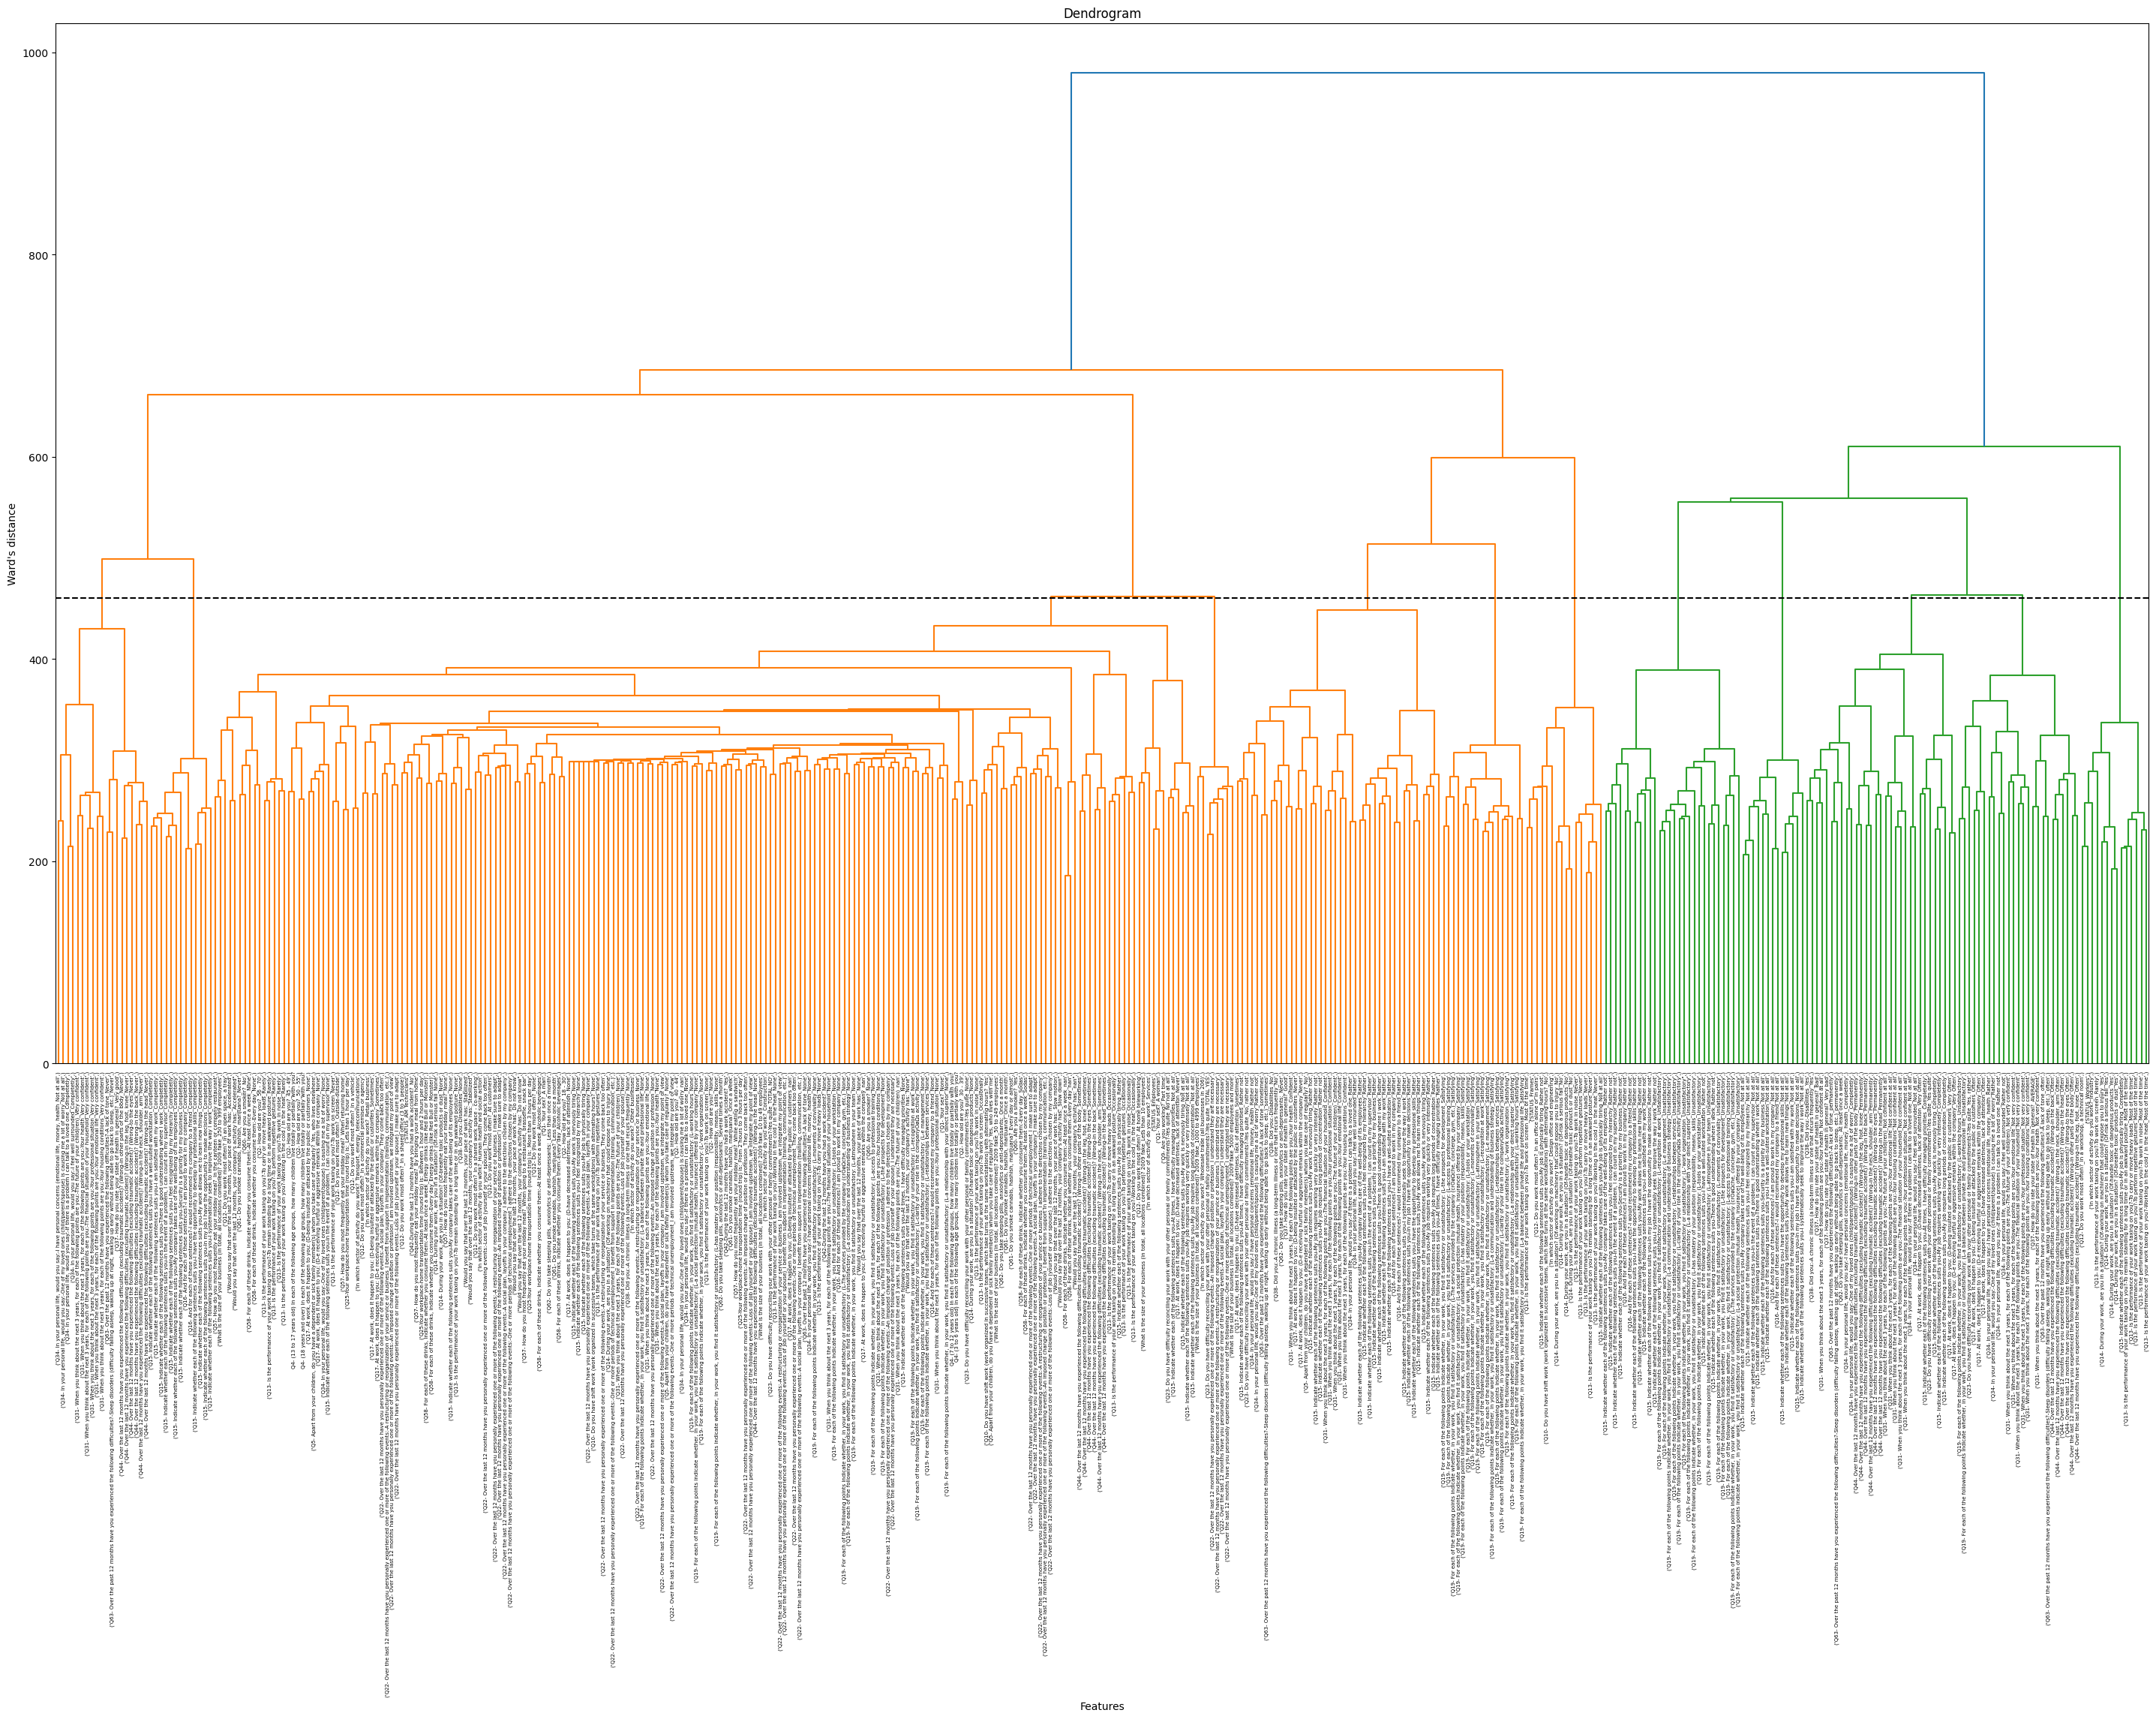

In [14]:
# Create a dendrogram to visualize the feature clustering
plt.figure(figsize=(36, 18)) 
plt.title('Hierarchical Clustering Dendrogram')

dendrogram(linked ,
            orientation='top', 
            labels=df_transposed.index,
            distance_sort='descending', 
            show_leaf_counts=True)
plt.axhline(y=threshold, color='black', linestyle='--')
# 45 degree angle for x axis labels
plt.xticks(rotation=90)
plt.title('Dendrogram')
plt.xlabel('Features')
plt.ylabel("Ward's distance")

plt.savefig('outputs/04_feat_cluster/dendrogram.png')

In [15]:
num_clusters = 12 # Adjust the number of clusters as needed (try 2, 3, 4, 8, 9 etc.)

labels = fcluster(linked, t=num_clusters, criterion='maxclust')

In [16]:
df_features_cleaned = df_features.copy()

# Clean the column names by replacing spaces and special characters with underscores
df_features_cleaned.columns = [str(col).replace(' ', '_').replace('?', '').replace('-', '_').replace('(', '').replace(')', '') for col in df_features.columns]

# Find correlation between features and outcome
correlations = []
for col in df_features_cleaned.columns:
    corr = data['outcome'].corr(df_features_cleaned[col])
    corr = round(corr, 3)
    correlations.append(corr)

In [17]:
df_clusters = pd.DataFrame(list(zip(df_features.columns , labels , correlations)),
                          columns=['feature','cluster','corr'])

df_clusters['abs_corr'] = df_clusters['corr'].abs()

df_clusters.sort_values(by=['cluster','abs_corr'], ascending=[True,False], inplace=True) 
df_clusters.reset_index(drop=True, inplace=True)
df_clusters.head(10)

,feature,cluster,corr,abs_corr
0,('Q15- Indicate whether each of the following ...,1,0.126,0.126
1,"('STATUS_Workers',)",1,0.123,0.123
2,('Q13- Is the performance of your work taxing ...,1,0.118,0.118
3,('Q13- Is the performance of your work taxing ...,1,0.116,0.116
4,('Q13- Is the performance of your work taxing ...,1,0.112,0.112
5,('Q13- Is the performance of your work taxing ...,1,0.112,0.112
6,"('Q14- During your work, are you in a situatio...",1,0.100,0.100
7,"('Q12- Do you work most often?_In a workshop, ...",1,0.097,0.097
8,('Q13- Is the performance of your work taxing ...,1,0.093,0.093
9,"('Q14- During your work, are you in a situatio...",1,0.088,0.088


In [18]:
c2_features = df_clusters[df_clusters['cluster']==2]['feature'].tolist() 
c3_features = df_clusters[df_clusters['cluster']==3]['feature'].tolist()

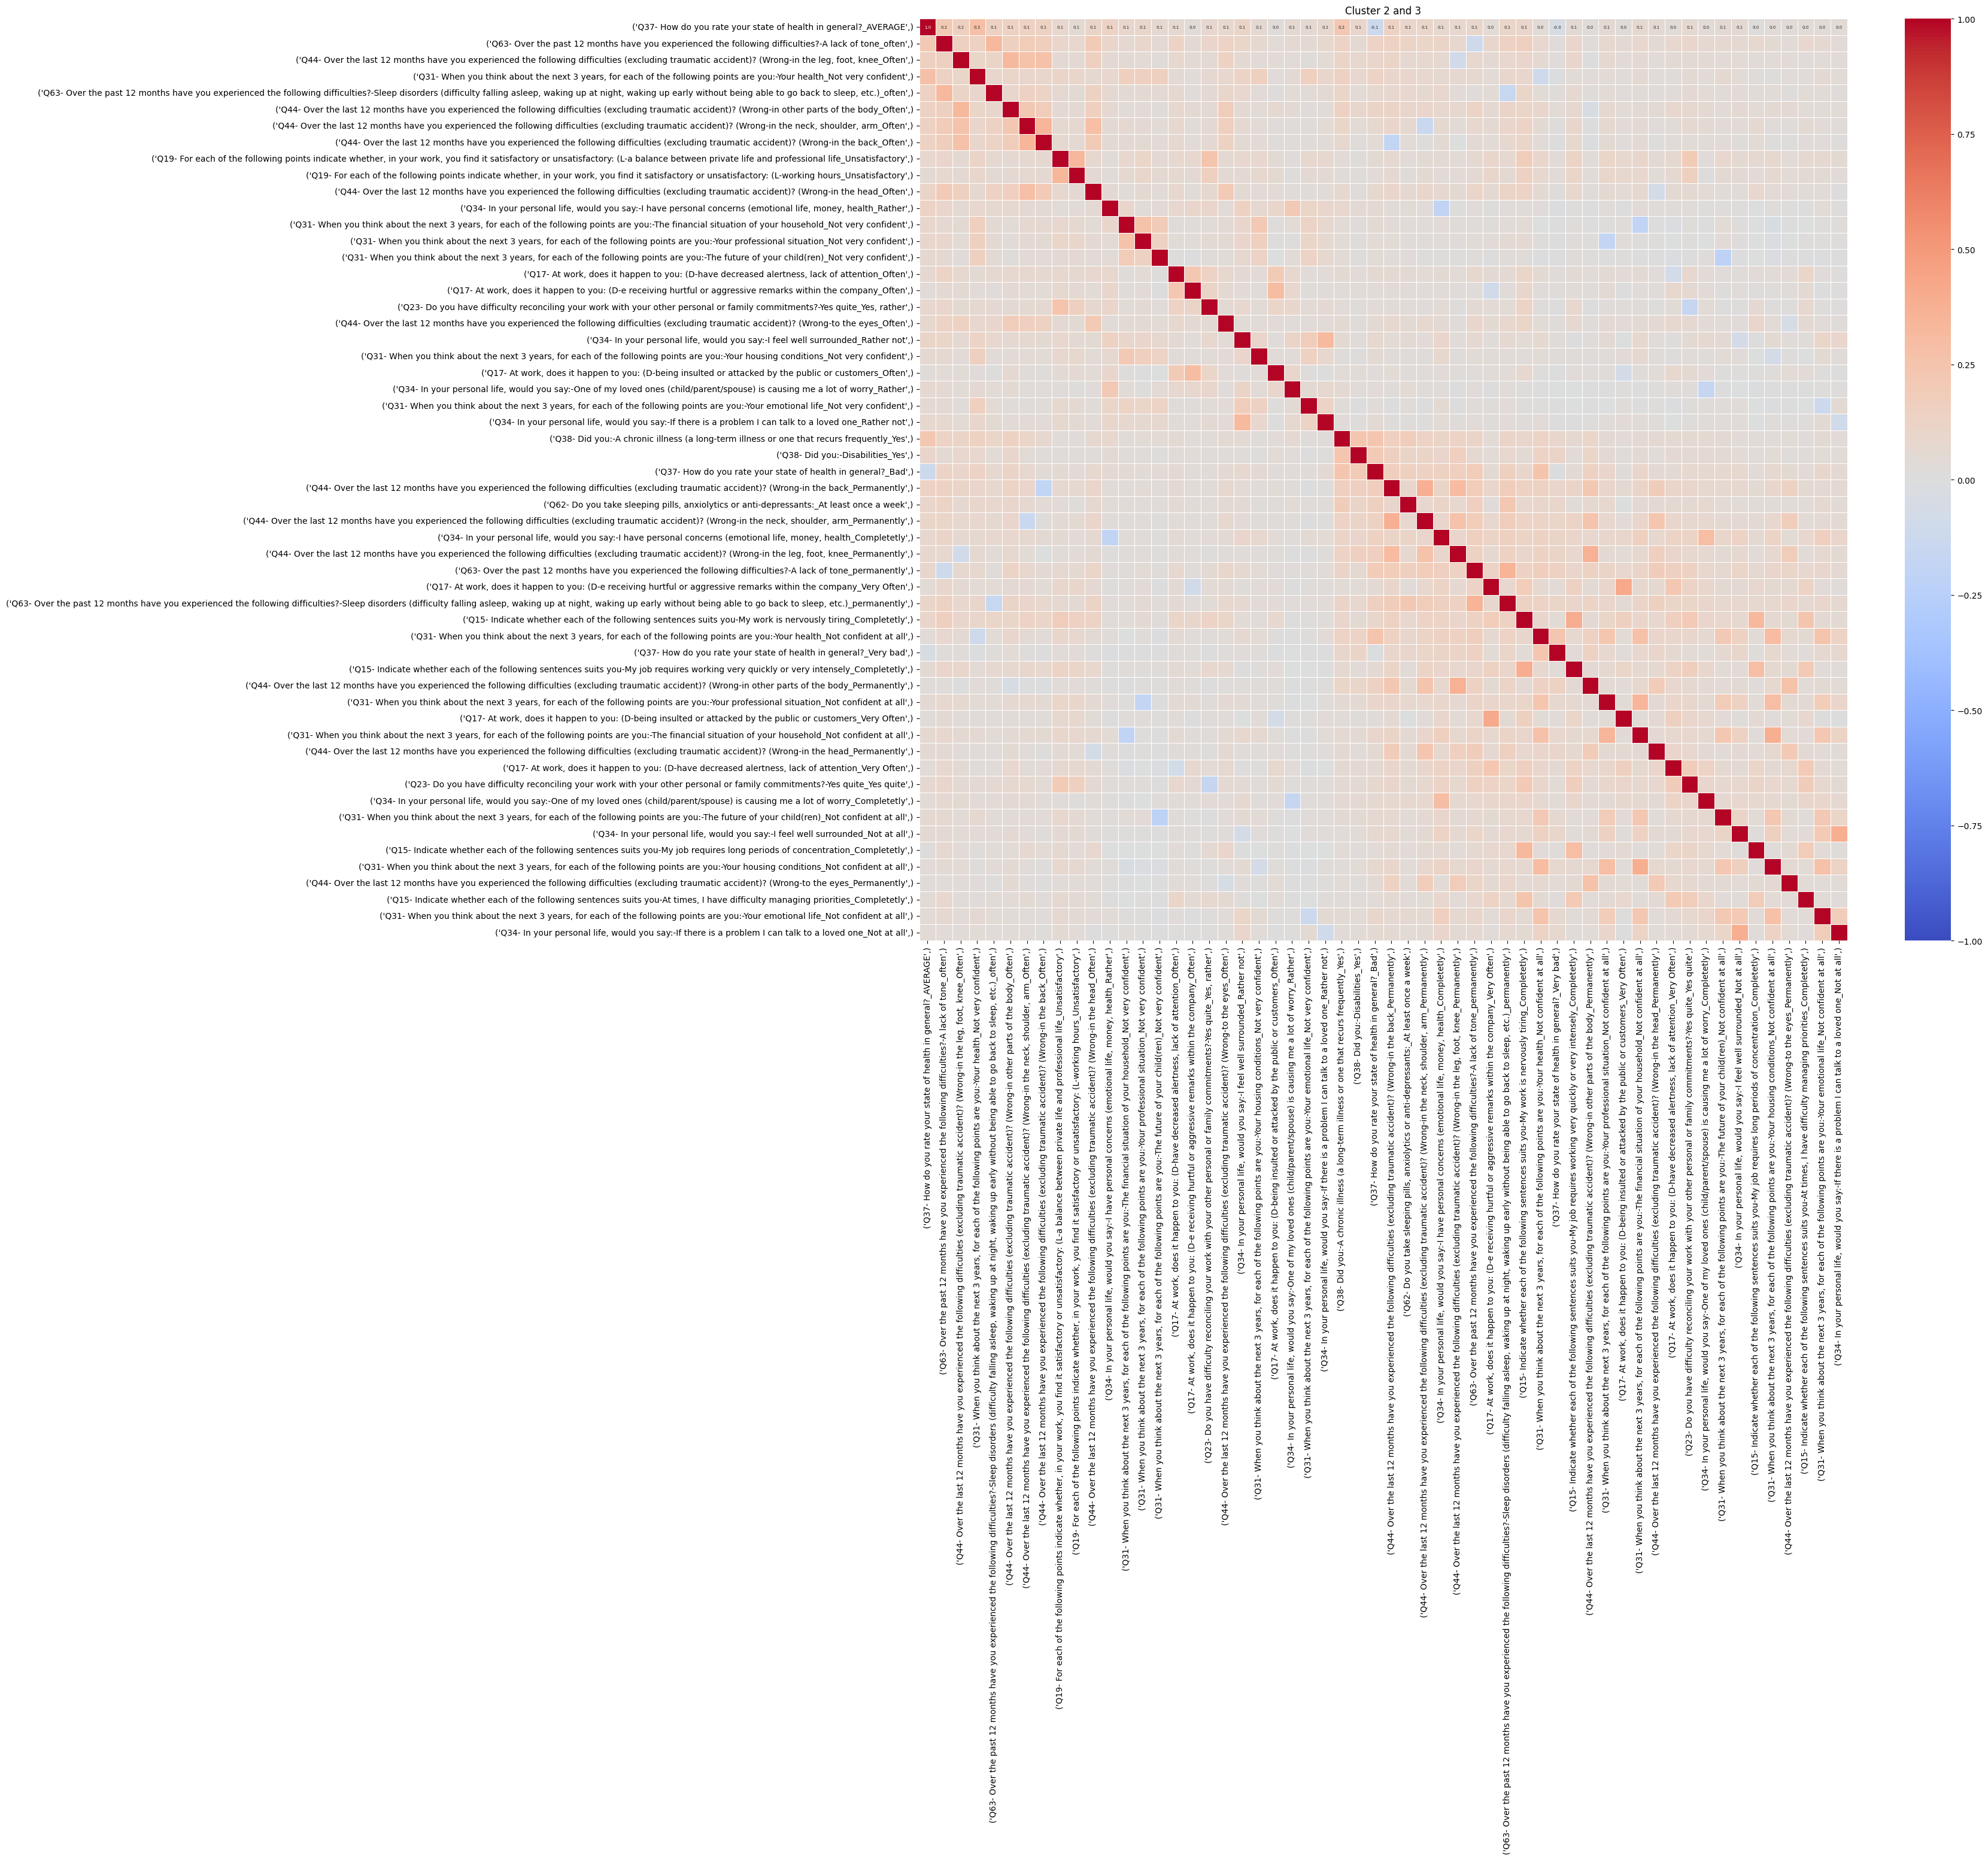

In [19]:
# Plot correlations for features in clusters 2 and 3
corr = df_features[np.append(c2_features ,c3_features)].corr()

# plot correlation matrix
plt.figure(figsize=(25, 20)) 
sns.heatmap(corr,
            annot=True, 
            cmap='coolwarm',
            linewidths=0.5, 
            fmt=".1f",
            annot_kws={"size": 5}, 
            vmin=-1, vmax=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Cluster 2 and 3')

plt.savefig('outputs/04_feat_cluster/corr_cluster_2_3.png')

In [20]:
df_clusters.to_csv('outputs/04_feat_cluster/feature_clusters.csv', index=False)

In [21]:
# print the features in each cluster

for i in range(1, num_clusters+1):
    print(f'Cluster {i}:')
    print(df_clusters[df_clusters['cluster']==i]['feature'].values)
    print('\n')

Cluster 1:
["('Q15- Indicate whether each of the following sentences suits you-My job is physically tiring_Completetly',)"
 "('STATUS_Workers',)"
 "('Q13- Is the performance of your work taxing on you?-To work in noise_Most of the time',)"
 "('Q13- Is the performance of your work taxing on you?-To perform repetitive gestures_Most of the time',)"
 "('Q13- Is the performance of your work taxing on you?-To remain standing for a long time or in an awkward posture_Most of the time',)"
 "('Q13- Is the performance of your work taxing on you?-To carry or move heavy loads_Most of the time',)"
 "('Q14- During your work, are you in a situation? (Of-working on machinery that could expose you to injury_Yes',)"
 "('Q12- Do you work most often?_In a workshop, a technical room',)"
 "('Q13- Is the performance of your work taxing on you?-Working in the cold / in the heat_Most of the time',)"
 "('Q14- During your work, are you in a situation? (Of-breathe toxic products or dust_Yes',)"
 "('Q14- During you